In [1]:
import tensorflow as tf

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use("default")

### Working with Moore's law

Moore's law is the observation that the number of transistors in a dense integrated circuit doubles about every two years.

$ C = A_{0}r^t $

$ logC = logr * t + logA_{0} $

Comparing this with $ y = wx + b $
- $ y = logC $
- $ w = logr $
- $ x = t $
- $ b = logA_{0} $

In [4]:
df = pd.read_csv("https://raw.githubusercontent.com/lazyprogrammer/machine_learning_examples/master/tf2.0/moore.csv",
                 header=None)
df.head(3)

,0,1
0,1971,2300
1,1972,3500
2,1973,2500


In [5]:
data = df.values

In [6]:
X = data[:, 0].reshape(-1, 1)
# conver X to 2-D array because keras expects it to be a 2-D array
y = data[:, 1]

In [7]:
X.shape, y.shape

((162, 1), (162,))

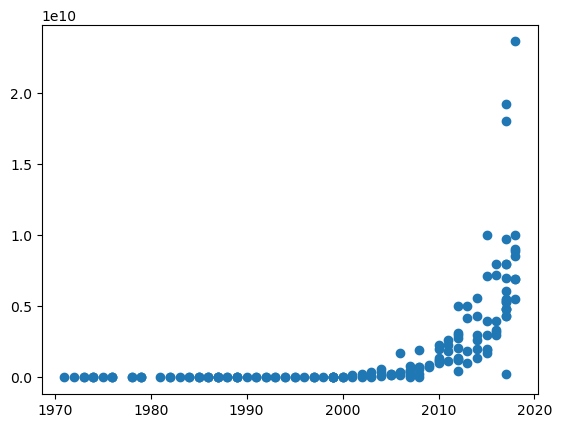

In [9]:
plt.scatter(X, y);

From the scatter plot, it doesn't look like it's linear. So we need convert the data with `log` to make it linear

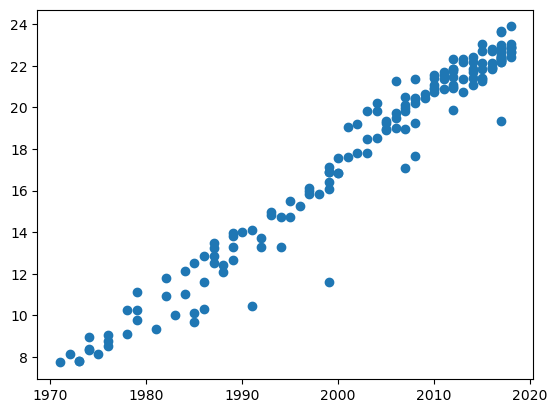

In [11]:
Y = np.log(y)
plt.scatter(X, Y);

The X data seems too large, try to center the X data

In [12]:
X = X - X.mean()

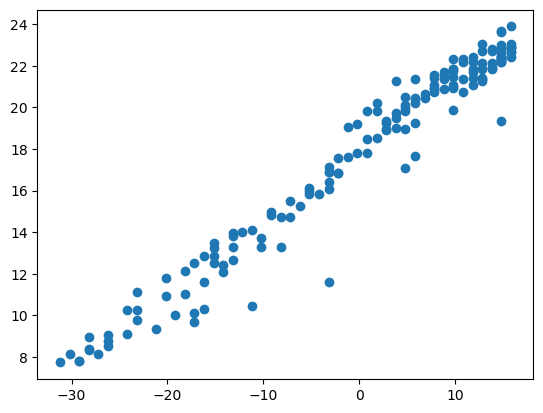

In [13]:
plt.scatter(X, Y);

In [15]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(1,)),
    tf.keras.layers.Dense(1)
])

In [16]:
# SGD(learning_rate, momentum)
model.compile(optimizer=tf.keras.optimizers.SGD(0.001, 0.9), loss="mse")

In [17]:
# learning rate scheduler
def schedule(epoch, lr):
    if(epoch >= 50):
        return 0.0001
    return 0.001

scheduler = tf.keras.callbacks.LearningRateScheduler(schedule)

In [18]:
r = model.fit(X, Y, epochs=200, callbacks=[scheduler])

Train on 162 samples
Epoch 1/200
162/162 [==============================] - 2s 14ms/sample - loss: 434.1418
Epoch 2/200
162/162 [==============================] - 0s 136us/sample - loss: 340.3149
Epoch 3/200
162/162 [==============================] - 0s 99us/sample - loss: 284.1430
Epoch 4/200
162/162 [==============================] - 0s 154us/sample - loss: 201.4558
Epoch 5/200
162/162 [==============================] - 0s 136us/sample - loss: 188.2860
Epoch 6/200
162/162 [==============================] - 0s 123us/sample - loss: 119.9965
Epoch 7/200
162/162 [==============================] - 0s 148us/sample - loss: 90.0027
Epoch 8/200
162/162 [==============================] - 0s 130us/sample - loss: 74.6401
Epoch 9/200
162/162 [==============================] - 0s 179us/sample - loss: 64.5133
Epoch 10/200
162/162 [==============================] - 0s 191us/sample - loss: 44.3128
Epoch 11/200
162/162 [==============================] - 0s 142us/sample - loss: 32.2864
Epoch 12/200
162

162/162 [==============================] - 0s 111us/sample - loss: 0.9262
Epoch 95/200
162/162 [==============================] - 0s 117us/sample - loss: 0.8773
Epoch 96/200
162/162 [==============================] - 0s 123us/sample - loss: 0.8734
Epoch 97/200
162/162 [==============================] - ETA: 0s - loss: 1.490 - 0s 123us/sample - loss: 0.8721
Epoch 98/200
162/162 [==============================] - 0s 130us/sample - loss: 0.8704
Epoch 99/200
162/162 [==============================] - 0s 123us/sample - loss: 0.8712
Epoch 100/200
162/162 [==============================] - 0s 105us/sample - loss: 0.8736
Epoch 101/200
162/162 [==============================] - 0s 111us/sample - loss: 0.8722
Epoch 102/200
162/162 [==============================] - 0s 117us/sample - loss: 0.8728
Epoch 103/200
162/162 [==============================] - 0s 117us/sample - loss: 0.8714
Epoch 104/200
162/162 [==============================] - 0s 111us/sample - loss: 0.8790
Epoch 105/200
162/162 [====

162/162 [==============================] - 0s 123us/sample - loss: 0.8776
Epoch 187/200
162/162 [==============================] - 0s 142us/sample - loss: 0.8701
Epoch 188/200
162/162 [==============================] - 0s 123us/sample - loss: 0.8821
Epoch 189/200
162/162 [==============================] - 0s 130us/sample - loss: 0.9046
Epoch 190/200
162/162 [==============================] - 0s 99us/sample - loss: 0.8772
Epoch 191/200
162/162 [==============================] - 0s 130us/sample - loss: 0.8777
Epoch 192/200
162/162 [==============================] - 0s 99us/sample - loss: 0.8719
Epoch 193/200
162/162 [==============================] - 0s 123us/sample - loss: 0.9021
Epoch 194/200
162/162 [==============================] - 0s 117us/sample - loss: 0.8907
Epoch 195/200
162/162 [==============================] - 0s 117us/sample - loss: 0.8822
Epoch 196/200
162/162 [==============================] - 0s 123us/sample - loss: 0.8878
Epoch 197/200
162/162 [=========================

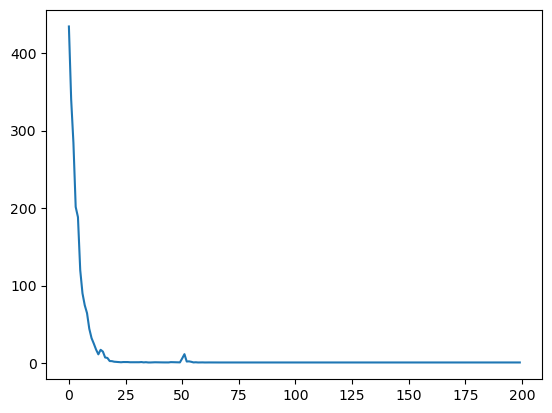

In [20]:
plt.plot(r.history["loss"], label="loss");

In [21]:
print(model.layers)

In [22]:
print(model.layers[0].get_weights())

[array([[0.33739436]], dtype=float32), array([17.759535], dtype=float32)]


In [27]:
# slope, w
w = model.layers[0].get_weights()[0][0,0]
w

0.33739436

From above, we know $ w = logr $

So, $ r = e^w = e^{0.33739436} = 1.4013 $

According to Moore's law at time `t`: $ C = A_{0}r^t $ ... ...`equation-1`

At time `t'` it should be: $ 2C = A_{0}r^{t'} $ ... ... ... ... ... ...`equation-2`

eqn2/eqn1: $ \frac{2C}{C} = \frac{A_{0}r^{t'}}{A_{0}r^t} $

=> $ 2 = r^{t' - t} $

=> $ t' - t = \frac{log2}{logr} $

=> $ t' - t = \frac{log2}{w} $

In [29]:
print(f"Time to double: {np.log(2) / w}")

Time to double: 2.0544124901281826


So the Moore's law is true